In [83]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt

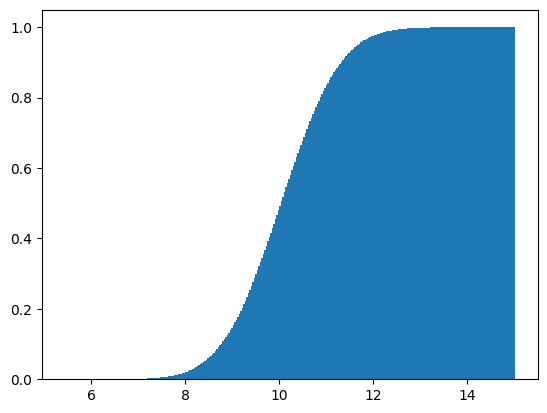

In [84]:
x = ss.rice(10).rvs(100000)
plt.hist(x, bins = 300, cumulative=True, density=True)
plt.show()

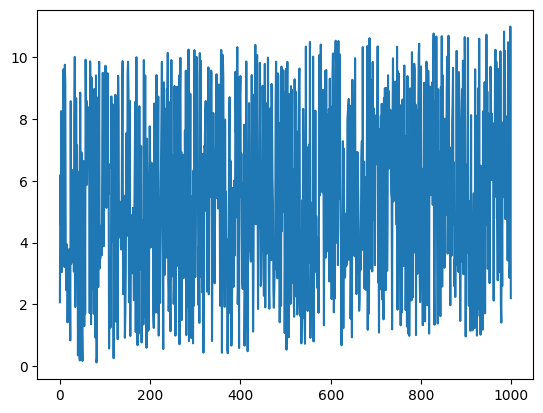

In [85]:
t = np.linspace(0, 100, 1000)
x = t * 0.01 + np.random.rand(1000) * 10 #0.01 наклон 10 шум
plt.plot(x)

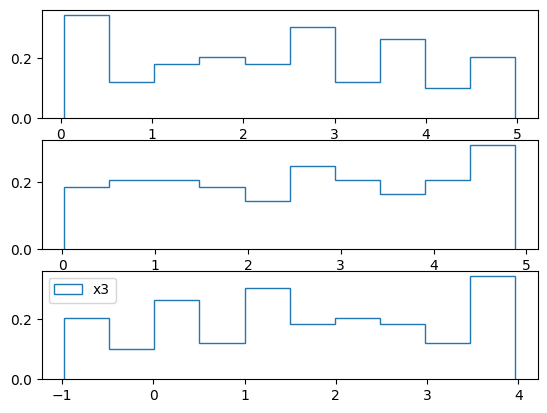

In [86]:
N = 100
x1 = np.random.rand(N) * 5
x2 = np.random.rand(N) * 5
#x3 = x1 + 4
#x3 = x1 * 10 + 4
x3 = x1 * -1 + 4
_, axs = plt.subplots(3, 1)
axs[0].hist(x1, bins=10, density=True, histtype='step', label='x1')
axs[1].hist(x2, bins=10, density=True, histtype='step', label='x2')
axs[2].hist(x3, bins=10, density=True, histtype='step', label='x3')
plt.legend()
plt.show()

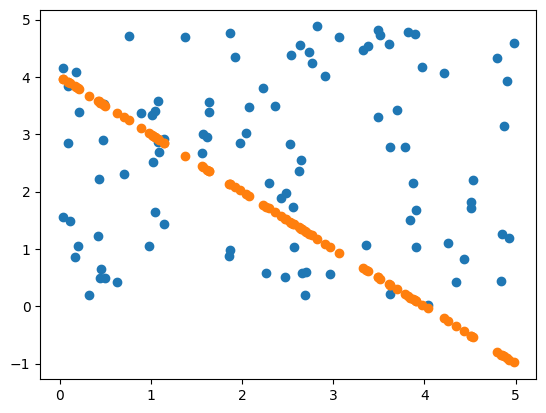

In [87]:
plt.scatter(x1, x2)
plt.scatter(x1, x3)

In [88]:
(x1 * x2).sum(), (x1 * x3).sum() 

(np.float64(621.0918469478967), np.float64(169.14168847742837))

In [89]:
(((x1 - x1.mean()) / x1.std() * (x2-x2.mean())) / x2.std()).mean(), (((x1 - x1.mean()) / x1.std()) * ((x3 - x3.mean()) / x3.std())).mean()

(np.float64(0.05477009839071043), np.float64(-0.9999999999999999))

In [90]:
#Коэфицент корелляции пирсона
from scipy.stats import pearsonr
R1, _ = pearsonr(x1, x2)
R2, _ = pearsonr(x1, x3)
R2, R1

(np.float64(-1.0), np.float64(0.05477009839071046))

### Корреляция

**Корреляция** — это статистическая мера, которая показывает, насколько сильно две переменные связаны друг с другом.

#### Коэффициент корреляции Пирсона (Pearson Correlation Coefficient)

*   **Что это?** Это мера *линейной* связи между двумя наборами данных. Он показывает, насколько хорошо данные можно описать прямой линией.
*   **Значения:** Варьируется от -1 до +1.
    *   **+1:** Идеальная положительная линейная связь (когда одна переменная увеличивается, другая тоже увеличивается).
    *   **-1:** Идеальная отрицательная линейная связь (когда одна переменная увеличивается, другая уменьшается).
    *   **0:** Нет линейной связи.
*   **Когда использовать?** Когда вы предполагаете, что между вашими переменными существует линейная зависимость и данные распределены нормально.

#### Коэффициент корреляции Спирмена (Spearman Correlation Coefficient)

*   **Что это?** Это мера *монотонной* связи между двумя переменными. В отличие от Пирсона, он не требует, чтобы связь была линейной. Он работает с рангами значений, а не с самими значениями.
*   **Как работает?** Сначала он преобразует каждый набор данных в ранги (самому маленькому значению присваивается ранг 1, следующему — 2 и т.д.), а затем вычисляет коэффициент Пирсона для этих рангов.
*   **Значения:** Также варьируется от -1 до +1.
    *   **+1:** Идеальная монотонная положительная связь (когда одна переменная увеличивается, другая никогда не уменьшается).
    *   **-1:** Идеальная монотонная отрицательная связь (когда одна переменная увеличивается, другая никогда не увеличивается).
    *   **0:** Нет монотонной связи.
*   **Когда использовать?**
    1.  Когда связь между переменными нелинейная, но монотонная (например, экспоненциальная).
    2.  Когда в данных есть выбросы, так как ранги менее чувствительны к ним.
    3.  Когда данные не распределены нормально.

В ячейке ниже вы вычисляете оба коэффициента, чтобы сравнить линейную (`pearsonr`) и монотонную (`spearmanr`) связь между переменными `x1`, `x2` и `x3`.

In [91]:
f = open('test1.dat')

d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)

for i in range(d.shape[1]):
  for j in range(i + 1, d.shape[1]):
    R, _ = pearsonr(d[:, i], d[:, j])
    if abs(R) > 0.5:
      print(i, j, R)

0 2 0.7136717988512671
0 3 0.971145375410722
1 2 0.7012506425858366
2 3 0.8601353942760076
4 5 0.9113910050433275


In [92]:
N = 100
x1 = np.random.rand(N) * 5
x2 = np.random.rand(N) * 5
x3 = np.exp(x1 * 10)
R1, _ = pearsonr(x1, x3)
R2, _ = pearsonr(x1, x2)
print(R1, R2)
from scipy.stats import spearmanr
R1, _ = spearmanr(x1, x3)
R2, _ = spearmanr(x1, x2)
print(R1, R2)

0.30532689945196345 0.2041091390295671
0.9999999999999999 0.1936993699369937


In [93]:
from scipy.stats import rankdata
x1p = rankdata(x1) #Выставление рангов
x3p = rankdata(x3)
R, _ = pearsonr(x1, x3)
print(R)
R, _ = pearsonr(x1p, x3p)
# Чтобы использовать коэфицент пирсона
# Нужно привести данные к одному масштабe
# Тоесть выставить ранг
# Ранги главное отличие между кореляцие спирмона и пирсона
print(R)


0.30532689945196345
0.9999999999999998


In [94]:
f = open('test1.dat')

d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)

for i in range(d.shape[1]):
  for j in range(i + 1, d.shape[1]):
    R, _ = spearmanr(d[:, i], d[:, j])
    if abs(R) > 0.5:
      print(i, j, R)

0 2 0.7083176883176884
0 3 0.9725209565209566
1 2 0.6932999732999733
2 3 0.8500066300066301
4 5 0.9166090366090366


(np.float64(-0.3182923192319232), np.float64(-0.363985307530753))

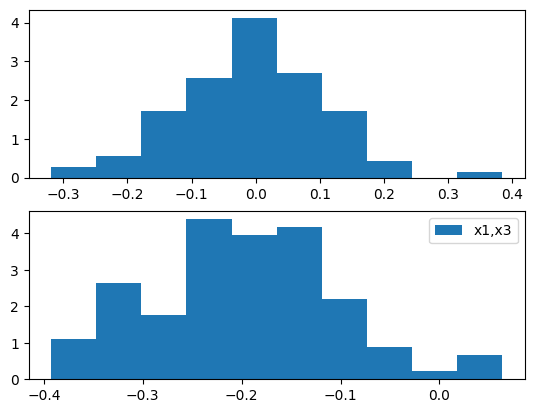

In [95]:
N=100

d1, d2 = [], []

for i in range(N):
  x1=np.random.rand(N)*5
  x2=np.random.rand(N)*5
  x3=np.exp(-x1*10)+np.random.rand(N)*0.1
  R1, _ = spearmanr(x1, x2)
  R2, _ = spearmanr(x1, x3)
  d1.append(R1)
  d2.append(R2)


fig, axs = plt.subplots(2, 1)
axs[0].hist(d1, bins=10,density = True, label='x1,x2')
axs[1].hist(d2, bins=10,density = True, label='x1,x3')
ci_d1 = np.percentile(d1, 0.025)
ci_d2 = np.percentile(d2, 0.975)
plt.legend()
ci_d1, ci_d2

array([ 0.31824751, -0.52074131,  0.22299223,  0.0189667 , -0.3768655 ,
       -0.17350952, -0.10689958, -0.41827151,  0.05643489,  0.12530562])

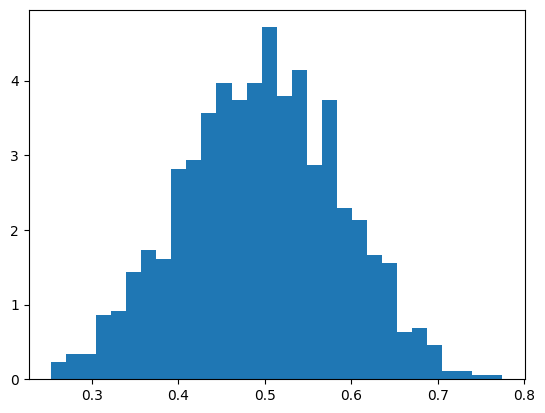

In [96]:
#Теория проверки гипотез
d = []
for i in range(1000):
  x = np.random.rand(10)
  y = x.mean()
  d.append(y)
plt.hist(d, bins=30, density=True)
x
x - 0.5 / 0.28 / np.sqrt(10)

### Проверка статистических гипотез

**Проверка гипотез** — это формальный способ принятия решений на основе данных. Мы используем её, чтобы определить, достаточно ли у нас доказательств, чтобы отвергнуть некоторое утверждение о совокупности.

Процесс выглядит так:

1.  **Формулируем гипотезы:**
    *   **Нулевая гипотеза ($H_0$)**: Утверждение, которое мы пытаемся опровергнуть. Обычно это утверждение об "отсутствии эффекта" или "отсутствии разницы". Например, $H_0$: среднее значение равно 0.5.
    *   **Альтернативная гипотеза ($H_1$ или $H_a$)**: Утверждение, которое мы принимаем, если отвергаем $H_0$. Например, $H_1$: среднее значение не равно 0.5.

2.  **Выбираем статистический критерий**: Это "линейка", которой мы измеряем, насколько наши данные отклоняются от того, что мы ожидали бы при истинности $H_0$. Примеры критериев: **z-критерий**, **t-критерий**.

3.  **Вычисляем статистику критерия**: Мы применяем формулу критерия к нашим данным и получаем одно число (например, z-статистику или t-статистику). Это число показывает, на сколько стандартных ошибок наше выборочное среднее отклоняется от предполагаемого среднего в $H_0$.

4.  **Принимаем решение**: Мы сравниваем полученную статистику с **критическими значениями** (которые определяются уровнем значимости, обычно 5% или 0.05) или вычисляем **p-value**.
    *   Если статистика попадает в "критическую область" (т.е. она более экстремальна, чем критические значения), мы **отвергаем** нулевую гипотезу.
    *   Если p-value меньше уровня значимости (например, p < 0.05), мы **отвергаем** нулевую гипотезу.

В ячейке ниже вы начинаете исследовать эту идею, генерируя выборки и смотря на их средние. Вы интуитивно пытаетесь понять, насколько сильно может отклоняться выборочное среднее от истинного среднего (0.5 для `np.random.rand`).

In [97]:
x = np.random.rand(10)
xm = x.mean()
z = (x.mean() - 0.5) / 0.28 / np.sqrt(10)
print(z)
D = ss.norm(0, 1)
D.ppf(0.025), D.ppf(0.975)

-0.07983681082433215


(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [98]:
D = ss.rice(1)
x = D.rvs(10)
print(x.mean())
z_rice = (x.mean() - 1) / (1 / np.sqrt(10))
print(z_rice)
D.ppf(0.025), D.ppf(0.975)

1.4297187228152854
1.3588899173148652


(np.float64(0.2886180632552991), np.float64(3.236385773575181))

In [99]:
D = ss.rayleigh(1)
x = D.rvs(10)
print(x.mean())
z_rice = (x.mean() - 1) / (1 / np.sqrt(10))
print(z_rice)
D.ppf(0.025), D.ppf(0.975)

2.398203692542362
4.421508301291649


(np.float64(1.2250235898046686), np.float64(3.7162030314812387))

In [100]:
# T критерий
x = np.random.rand(1000)
xm = x.mean()
z = (xm - 0.5) / 0.28 / np.sqrt(10)
D = ss.t(df = 9)
print(x.mean())
t_stat = (x.mean() - 1) / (x.std() / np.sqrt(10))
print(t_stat)
D.ppf(0.025), D.ppf(0.975)

0.49240179909354004
-5.516813655120331


(np.float64(-2.2621571628540997), np.float64(2.2621571628540993))

### T-критерий Стьюдента (Student's t-test)

**t-критерий** — это статистический тест, который используется для сравнения средних значений одной или двух выборок.

#### В чем разница с z-критерием?

*   **z-критерий** используется, когда мы **знаем** стандартное отклонение генеральной совокупности ($\sigma$). Это бывает редко на практике.
*   **t-критерий** используется, когда мы **не знаем** стандартное отклонение генеральной совокупности и оцениваем его по выборке (используем `x.std()`).

Из-за этой дополнительной неопределенности (оценки $\sigma$ по выборке) t-распределение имеет "более тяжелые хвосты", чем нормальное распределение, особенно для небольших выборок. Это означает, что нам нужны более сильные отклонения, чтобы отвергнуть нулевую гипотезу.

#### Формула (для одной выборки):

$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

Где:
*   $\bar{x}$ — выборочное среднее.
*   $\mu_0$ — предполагаемое среднее из нулевой гипотезы.
*   $s$ — выборочное стандартное отклонение.
*   $n$ — размер выборки.

Полученная **t-статистика** затем сравнивается с критическими значениями из **t-распределения** с $n-1$ степенями свободы (`df = n-1`).

В ячейке ниже вы правильно применяете t-критерий для проверки гипотезы о том, что среднее значение выборки `x` равно 1. Вы вычисляете t-статистику и сравниваете ее с критическими значениями для t-распределения с 9 степенями свободы.

2.227318065430582
-1.7261848586295974


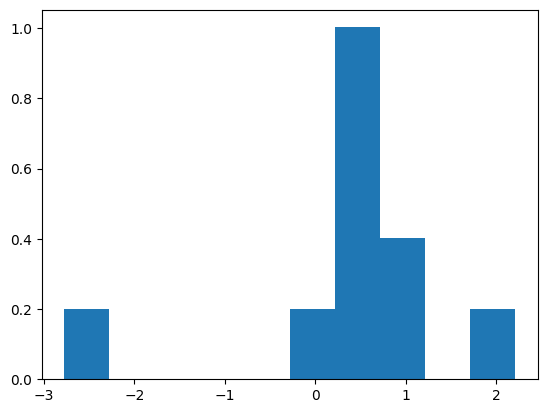

(np.float64(-2.2621571628540997), np.float64(2.2621571628540993))

In [101]:
D = ss.rice(1)
x = D.rvs(10)
t_stat = (x.mean() - 1) / (x.std() / np.sqrt(10))
print(t_stat)
D = ss.t(df = 9)
x = D.rvs(10)
t_stat = (x.mean() - 1) / (x.std() / np.sqrt(10))
print(t_stat)
plt.hist(x, bins = 10, density = True)
plt.show()
D.ppf(0.025), D.ppf(0.975)

In [102]:
nums = np.array([10,4,7,12,6,8])
t_stat = (nums.mean() - 10 ) / (nums.std() / np.sqrt(len(nums)))
print(t_stat)
D = ss.t(len(nums) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t_stat < D.ppf(0.025) or t_stat > D.ppf(0.975)):
  print(False)
else:
  print(True)

-2.034398070733474
-2.5705818356363146 2.570581835636314
True


In [ ]:
x = np.ones(100)
x[:5, ] = 0
print(x.mean())
t = (x.mean() - 0.90) / (x.std() / np.sqrt(len(x)))
print(t)
D = ss.t(len(x) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t < D.ppf(0.025) or t > D.ppf(0.975)):
  print("!= 0.9")
else:
  print("== 0.9")

0.95
2.2941573387056136
-1.9842169515086832 1.9842169515086827
!= 0.9


In [104]:
x = np.zeros(100)
x[:5, ] = 1
t = (x.mean() - 0.03) / (x.std() / np.sqrt(len(x)))
print(t)
D = ss.t(len(x) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t < D.ppf(0.025) or t > D.ppf(0.975)):
  print("!= 0.03")
else:
  print("== 0.03")

0.9176629354822474
-1.9842169515086832 1.9842169515086827
== 0.03


In [119]:
# Критерии для доли
# z-критерий для доли
z_doly = (x.mean() - 0.03) / (np.sqrt(0.03 * (1 - 0.03) / 100))
print(z_doly)
D = ss.t(0, 1)
print(D.ppf(0.025), D.ppf(0.975))
if (z_doly < D.ppf(0.025) or z_doly > D.ppf(0.975)):
  print("!= 0.03")
else:
  print("== 0.03")

1.1724207635210986
nan nan
== 0.03


### Z-критерий для долей

**Z-критерий для долей** используется, когда мы хотим проверить гипотезу о доле (проценте) в генеральной совокупности. Это особый случай z-критерия.

*   **Когда использовать?** Когда ваши данные бинарны (например, 1/0, успех/неудача, клик/нет клика) и вы хотите проверить, отличается ли наблюдаемая доля от некоторого ожидаемого значения.
*   **Пример:** У нас есть баннер, на который кликнули 5 из 100 человек (доля = 0.05). Мы хотим проверить, отличается ли эта доля статистически значимо от ожидаемой доли в 3% ($p_0 = 0.03$).

#### Формула:

$Z = \frac{p - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}$

Где:
*   $p$ — наблюдаемая доля в выборке (`x.mean()`).
*   $p_0$ — предполагаемая доля из нулевой гипотезы.
*   $n$ — размер выборки.

**Важное отличие от t-критерия:** В знаменателе мы используем $p_0$ (предполагаемую долю), а не $p$ (наблюдаемую). Это потому, что при проверке гипотез мы строим распределение в предположении, что нулевая гипотеза верна.

Полученная **Z-статистика** сравнивается с критическими значениями из **стандартного нормального распределения** (`ss.norm(0, 1)`).

В ячейке ниже вы правильно рассчитываете Z-статистику для проверки гипотезы о том, что истинная доля единиц в вашей выборке равна 0.03.

In [106]:
import math
observed=np.zeros(100)
observed[:5]=1
p0=0.03
p=observed.mean()
N=observed.shape[0]
Z=(p-p0)/math.sqrt((p0*(1-p0)/N))
print('Z:',Z)
D=ss.norm(0,1)
D.ppf(0.025),D.ppf(0.975)

Z: 1.1724207635210986


(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [107]:
Pv = 2 * (1 - D.cdf(abs(Z))) #P_value
Pv
# если p-value > 0.05, то её можно примять
# h0 нельзя отвергнуть с уровнем значимости 0.05 или 95% вероятностью
# умножает для двухсторонеего интервала на 2

np.float64(0.2410281672644321)

### P-value (p-значение)

**P-value** — это один из самых важных, но часто неправильно понимаемых концептов в статистике.

*   **Что это?** P-value — это вероятность получить наблюдаемые данные (или еще более экстремальные) при условии, что **нулевая гипотеза верна**.

*   **Как его интерпретировать?**
    *   **Маленькое p-value (например, < 0.05):** Это означает, что наши данные очень маловероятны, если бы нулевая гипотеза была правдой. Это дает нам сильные основания **отвергнуть** нулевую гипотезу. Результат считается **статистически значимым**.
    *   **Большое p-value (например, > 0.05):** Это означает, что наши данные вполне согласуются с нулевой гипотезой. У нас **нет оснований отвергать** нулевую гипотезу. Это НЕ означает, что нулевая гипотеза верна, а лишь то, что у нас недостаточно доказательств, чтобы ее опровергнуть.

*   **Уровень значимости ($\alpha$)**: Это порог, который мы устанавливаем заранее (обычно 0.05).
    *   Если `p-value <= alpha`, мы отвергаем $H_0$.
    *   Если `p-value > alpha`, мы не отвергаем $H_0$.

В ячейке ниже вы вычисляете p-value для Z-статистики, которую получили ранее.
`D.cdf(abs(Z))` дает вероятность получить значение, меньшее или равное `abs(Z)`.
`1 - D.cdf(abs(Z))` дает вероятность получить значение, большее `abs(Z)` (площадь "хвоста").
Мы умножаем на 2, потому что у нас **двусторонняя гипотеза** (мы проверяем `!= 0.03`, то есть отклонения в обе стороны). Мы хотим знать вероятность получить такое же сильное отклонение как в положительную, так и в отрицательную сторону.

In [ ]:
Pv = 2 * (1 - D.cdf(abs(z)))
print(Pv)
if Pv <= 0.05:
  print("Банер хуже")
else:
  print("Банер лучше")


0.9931532026686907
Банер хуже
